In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

Barcelona prices for 2021

In [9]:
ds = pd.read_csv("E:/dev/ml_course_rv/ml_course_homework/Barcelona_Fotocasa_HousingPrices.csv")

In [10]:
ds.head()

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
0,0,750,3,1,True,False,60,flat,Horta- Guinardo,12.500000
1,1,770,2,1,True,False,59,flat,Sant Andreu,13.050847
2,2,1300,1,1,True,True,30,flat,Gràcia,43.333333
3,3,2800,1,1,True,True,70,flat,Ciutat Vella,40.000000
4,4,720,2,1,True,False,44,flat,Sant Andreu,16.363636


In [11]:
ds.tail()

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
8183,8183,1075,2,2,False,False,65,flat,Gràcia,16.538462
8184,8184,1500,3,2,True,False,110,flat,Eixample,13.636364
8185,8185,1500,2,2,True,True,90,flat,Sarria-Sant Gervasi,16.666667
8186,8186,1500,3,2,True,False,110,flat,Eixample,13.636364
8187,8187,1500,3,2,True,False,110,flat,Eixample,13.636364


In [12]:
ds.describe()

,Unnamed: 0,price,rooms,bathroom,square_meters,square_meters_price
count,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000
mean,4093.500000,1444.092574,2.420738,1.508793,84.610161,17.739121
std,2363.816335,1125.886215,1.138592,0.732798,47.874028,9.245241
min,0.000000,320.000000,0.000000,1.000000,10.000000,4.910714
25%,2046.750000,875.000000,2.000000,1.000000,56.000000,12.790698
50%,4093.500000,1100.000000,2.000000,1.000000,73.000000,15.306122
75%,6140.250000,1540.000000,3.000000,2.000000,95.000000,19.444444
max,8187.000000,15000.000000,10.000000,8.000000,679.000000,186.666667


In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8188 non-null   int64  
 1   price                8188 non-null   int64  
 2   rooms                8188 non-null   int64  
 3   bathroom             8188 non-null   int64  
 4   lift                 8188 non-null   bool   
 5   terrace              8188 non-null   bool   
 6   square_meters        8188 non-null   int64  
 7   real_state           7920 non-null   object 
 8   neighborhood         8188 non-null   object 
 9   square_meters_price  8188 non-null   float64
dtypes: bool(2), float64(1), int64(5), object(2)
memory usage: 527.9+ KB


In [15]:
sns.set_palette("GnBu_d")
sns.set_style("whitegrid")

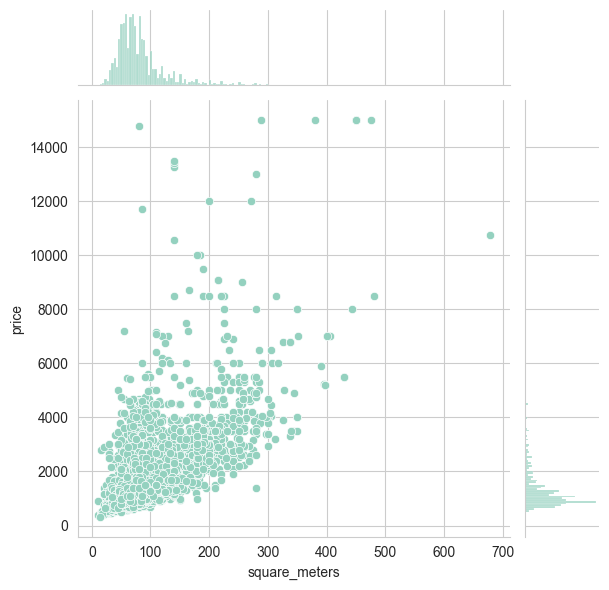

In [19]:
sns.jointplot(x="square_meters", y="price", data=ds)

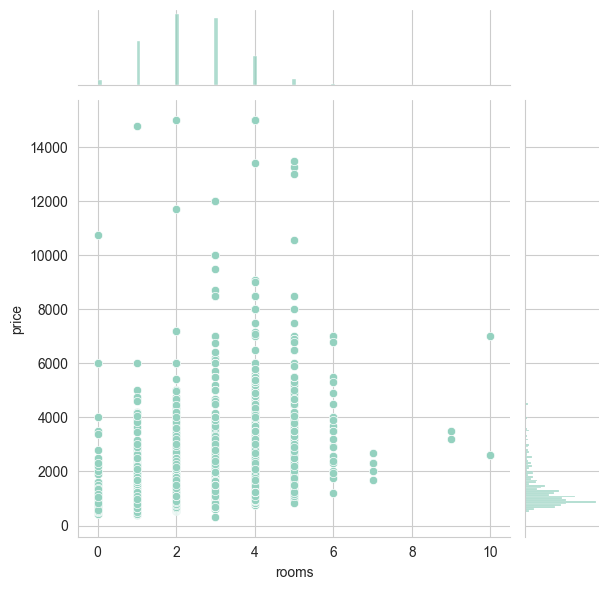

In [20]:
sns.jointplot(x="rooms", y="price", data=ds)

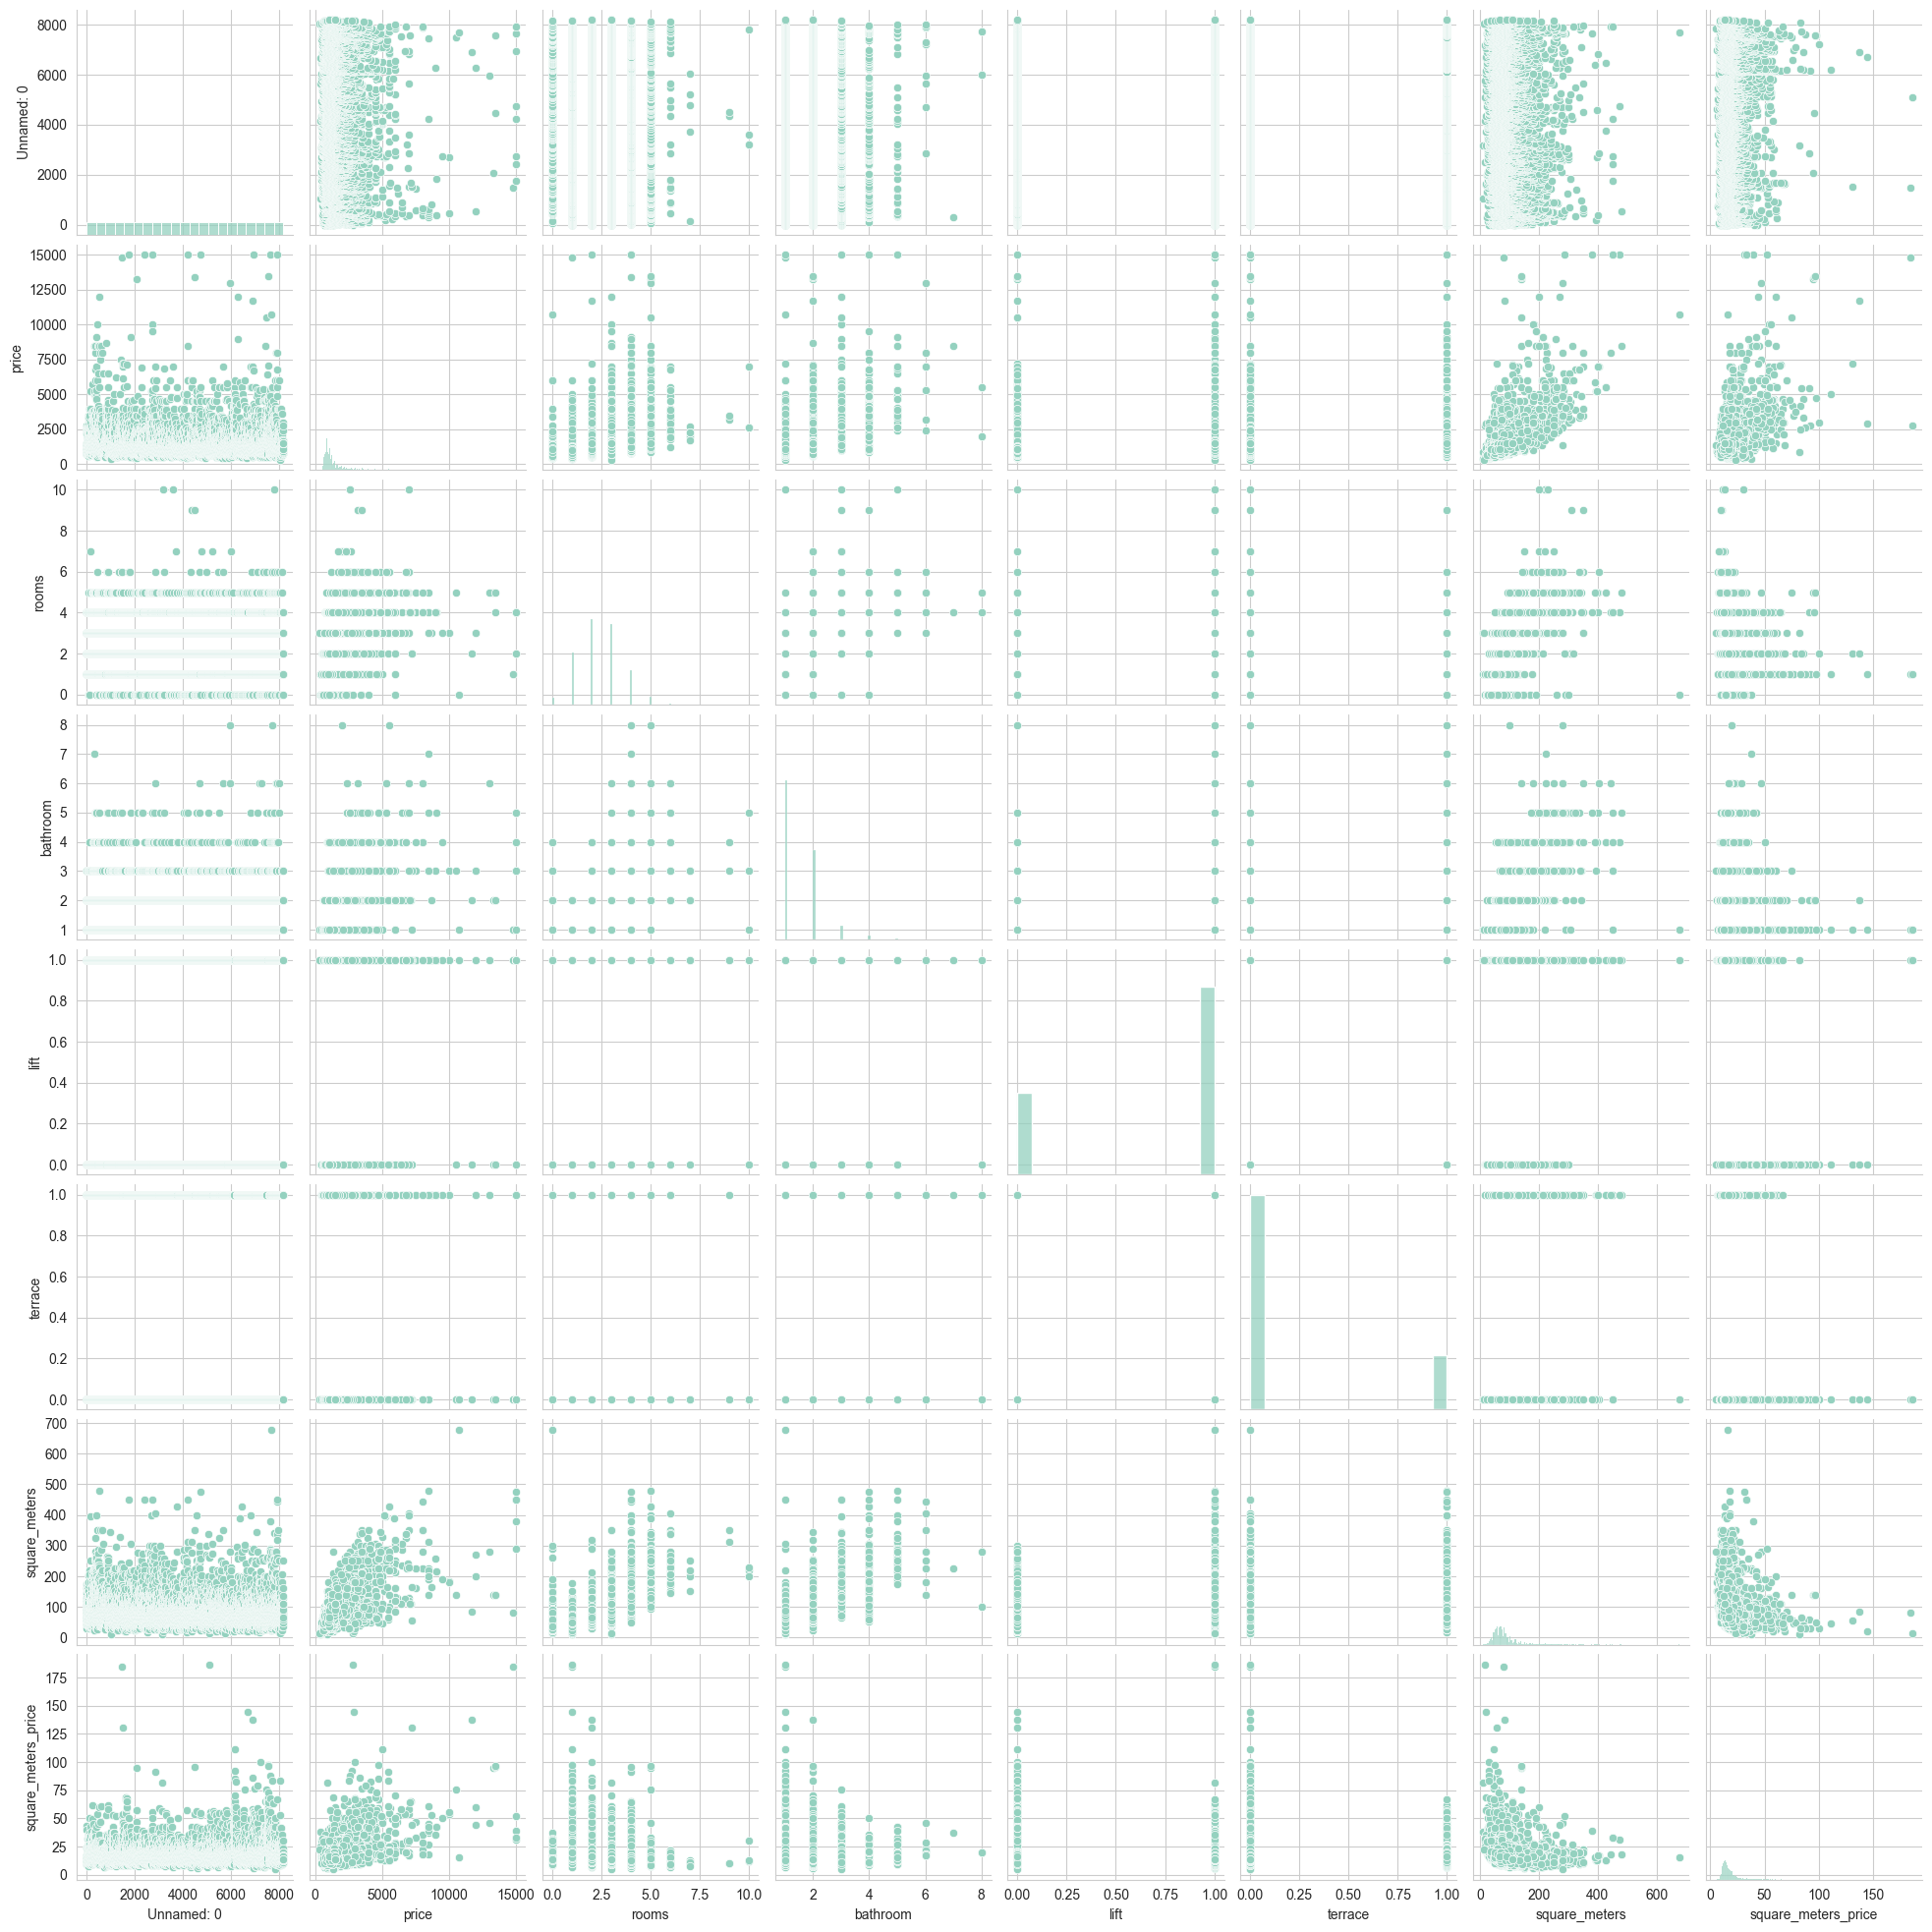

In [21]:
sns.pairplot(ds)

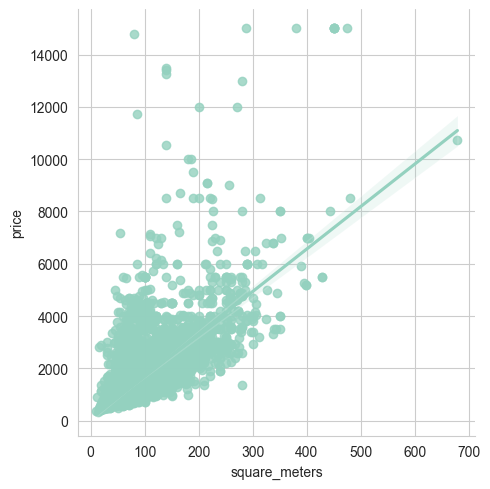

In [23]:
sns.lmplot(x="square_meters", y="price", data=ds)

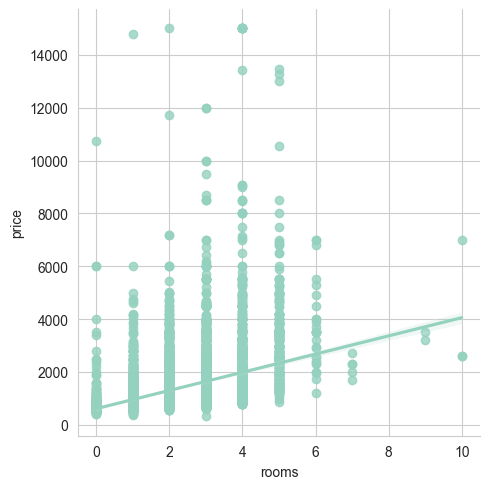

In [24]:
sns.lmplot(x="rooms", y="price", data=ds)

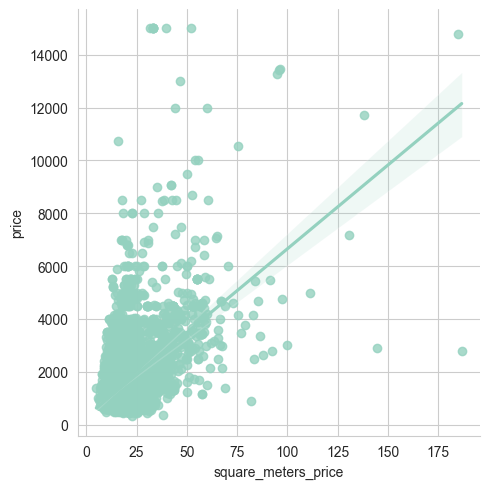

In [25]:
sns.lmplot(x="square_meters_price", y="price", data=ds)

Training sets


In [27]:
X = ds[["square_meters_price", "square_meters", "rooms"]]
y = ds[["price"]]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [30]:
X_train

,square_meters_price,square_meters,rooms
3783,13.571429,70,2
2110,15.000000,52,2
2002,10.192053,151,4
3047,21.818182,55,1
418,16.000000,50,1
...,...,...,...
5226,18.555556,45,1
5390,15.000000,120,3
860,23.529412,170,4
7603,14.375000,80,3


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
linear_model = LinearRegression()

In [33]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [34]:
print("Coef: ", linear_model.coef_)

Coef:  [[ 74.6184796   18.92168161 -27.32388305]]


In [35]:
prediction = linear_model.predict(X_test)

Text(0, 0.5, 'New Predicted Y')

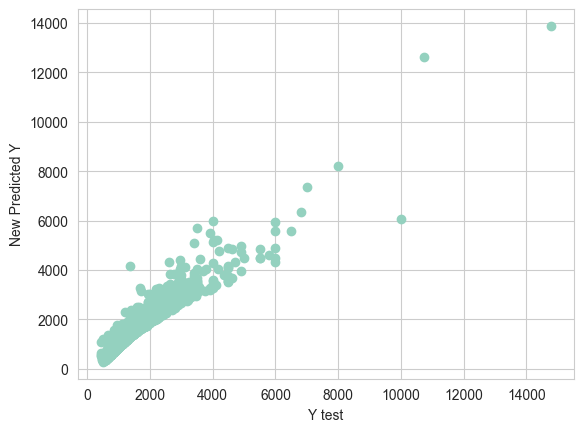

In [36]:
plt.scatter(y_test, prediction)
plt.xlabel("Y test")
plt.ylabel("New Predicted Y")

In [38]:
from sklearn import metrics

print("MAE: ", metrics.mean_absolute_error(y_test, prediction))
print("MSE: ", metrics.mean_squared_error(y_test, prediction))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  157.8859016176924
MSE:  87303.28860255744
RMSE:  295.47129911813335


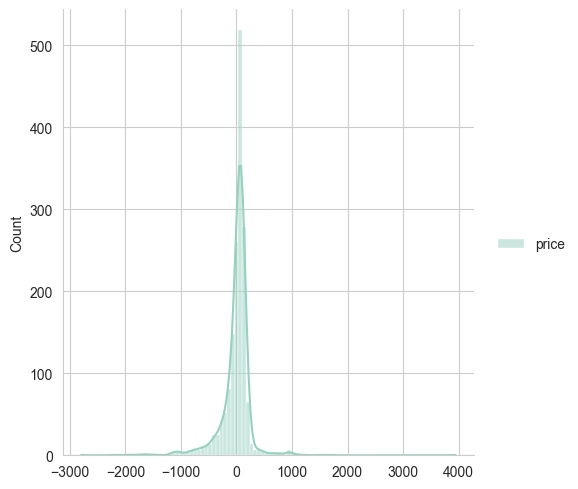

In [41]:
sns.displot((y_test-prediction), bins=100, kde=True)

In [50]:
data = {
    "square_meters_price": [5, 6 ,6],
    "square_meters": [82, 84 ,76],
    "rooms": [2, 1, 1]
}
ds_pred = pd.DataFrame(data)

In [51]:
ds_pred

,square_meters_price,square_meters,rooms
0,5,82,2
1,6,84,1
2,6,76,1


In [52]:
new_pred = linear_model.predict(ds_pred)

In [53]:
print(new_pred)

[[456.52860357]
 [596.31432945]
 [444.94087654]]
